In [1]:
# mengimport library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# membaca dataset yang ditampung pada variabel dataset menggunakan pandas
dataset = pd.read_csv('R04_corruptions.csv')

In [3]:
# pemilihan variable
# Variabel independen (X) dipilih sebagai 'Government Transparency (Y)' 
# dan variabel dependen (y) dipilih sebagai 'Corruption Perception (X)'
X = dataset[['Government Transparency (Y)']]
y = dataset['Corruption Perception (X)']

In [4]:
# Pembagian data
# Data dibagi menjadi data training dan data testing menggunakan train_test_split dari scikit-learn.
# Sebanyak 80% data digunakan untuk training (X_train, y_train), dan 20% untuk testing (X_test, y_test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Pembentukan model
# Model regresi linier (LinearRegression()) dibentuk dan dilatih menggunakan data training (X_train, y_train)
# dengan memanggil metode fit().
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Prediksi dan evaluasi model
# Model digunakan untuk melakukan prediksi pada data testing (X_test) dan hasilnya disimpan dalam y_pred.
# Evaluasi model dilakukan dengan menghitung Mean Squared Error (mean_squared_error) dan R-squared Score (r2_score).
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [7]:
# Menampilkan hasil
# Hasil evaluasi model, yaitu Mean Squared Error dan R-squared Score, dicetak ke layar.
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# Mean Squared Error (MSE) sebesar 0.1244, mengindikasikan rata-rata kuadrat dari selisih antara nilai sebenarnya 
# dan nilai prediksi. Nilai MSE yang lebih rendah menunjukkan kualitas prediksi yang lebih baik.
# R-squared Score (R^2) sebesar 0.8488, yang merupakan koefisien determinasi. R^2 Score mendekati 1 menandakan bahwa 
# model secara baik menjelaskan variabilitas dalam data. Nilai 0.8488 menunjukkan bahwa model regresi linier dengan 
# variabel 'Government Transparency' cukup baik dalam menjelaskan variabilitas korupsi dalam dataset.

Mean Squared Error: 0.12441088495080364
R^2 Score: 0.8487671581369576


In [14]:
tingkat_transparency_uji = 73
# menetapkan tingkat Government Transparency yang ingin diuji sebesar 73.
new_data = np.array([[tingkat_transparency_uji]])
# kita membuat array numpy dari nilai `tingkat_transparency_uji` dalam format yang sesuai dengan input model. 
# Model memerlukan input dalam bentuk array dua dimensi.
predicted_cpi = model.predict(new_data)
# Model digunakan untuk memprediksi nilai Corruption Perception berdasarkan tingkat Government Transparency pada data baru. 
# Hasil prediksi disimpan dalam variabel `predicted_cpi`.

C:\Users\adise\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
print(f'Predicted CPI for Government Transparency {tingkat_transparency_uji}: {predicted_cpi[0]}')
# Hasil prediksi Corruption Perception kemudian dicetak ke layar. Dalam contoh ini, hasil prediksi adalah sekitar 
# 2.6323 untuk tingkat Government Transparency sebesar 73.

Predicted CPI for Government Transparency 73: 2.632300357568533


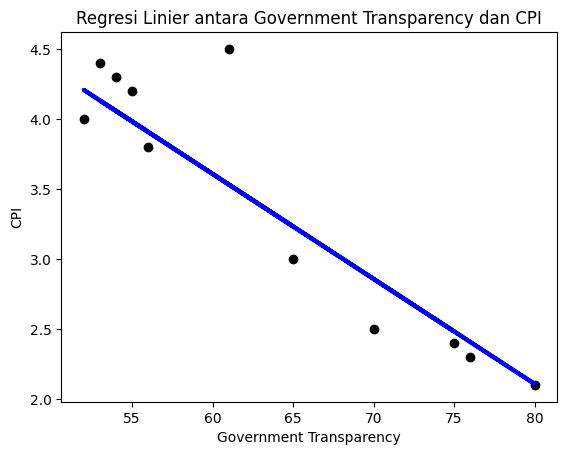

In [16]:
plt.scatter(X_test, y_test, color='black')
# Scatter plot digunakan untuk menampilkan titik-titik hitam yang mewakili data uji. 
# Pada sumbu x, kita memiliki tingkat Government Transparency (variabel independen), dan pada sumbu y, kita memiliki nilai 
# Corruption Perception (variabel dependen). Setiap titik hitam merepresentasikan satu data uji.
plt.plot(X_test, y_pred, color='blue', linewidth=3)
# Garis regresi linear yang dihasilkan oleh model ditampilkan sebagai garis biru pada plot. 
# Garis ini mencoba untuk "memotret" pola hubungan linier antara tingkat Government Transparency dan nilai Corruption Perception 
# yang dipelajari oleh model selama pelatihan.
plt.title('Regresi Linier antara Government Transparency dan CPI')
# Memberikan judul plot untuk memberikan konteks tentang apa yang sedang ditampilkan, yaitu regresi linier antara tingkat 
# Government Transparency dan nilai Corruption Perception.
plt.xlabel('Government Transparency')
plt.ylabel('CPI')
# Memberikan label pada sumbu x dan sumbu y, membantu membaca dan menginterpretasi plot dengan menyebutkan variabel apa 
# yang diwakili oleh setiap sumbu.
plt.show()
# Menampilkan plot secara keseluruhan.

In [ ]:
# Jika titik-titik cenderung mengikuti garis regresi, itu menunjukkan adanya hubungan linier antara variabel independen dan 
# dependen. Seperti yang terlihat, titik-titik cenderung mengikuti garis regresi. Berarti ada hubungan linear antara 
# Government Transparency dan Corruption Perception.

In [13]:
# Menampilkan nilai unik dari kolom Government_Transparency pada dataset latih
unique_transparency_values = X_train['Government Transparency (Y)'].unique()
print(f'Unique Transparency Values in Training Data: {unique_transparency_values}')

# Menampilkan statistik deskriptif dari kolom Government_Transparency pada dataset latih
print(X_train['Government Transparency (Y)'].describe())


Unique Transparency Values in Training Data: [68 65 73 57 53 55 60 63 66 78 69 62 71 61 75 80 54 72 59 58 51 82 50 52
 70 76 56]
count    44.000000
mean     64.340909
std       9.154852
min      50.000000
25%      57.000000
50%      63.000000
75%      71.250000
max      82.000000
Name: Government Transparency (Y), dtype: float64
